# Visualize Port Scan

In [2]:
import pandas as pd
import os
import warnings
import matplotlib.pyplot as plt
import networkx as nx

# Suppress DeprecationWarning from pandas
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
attack_file_relative_path = '../data/Edge-IIoTset dataset/Attack traffic/Port_Scanning_attack.csv'

attack_file = os.path.abspath(attack_file_relative_path)
# Read the CSV file
attack_port_scan = pd.read_csv(attack_file)

# Display the data
attack_port_scan.head(5)

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,2021 16:03:29.475073000,192.168.0.170,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Port_Scanning
1,2021 16:03:29.475121000,192.168.0.128,192.168.0.170,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Port_Scanning
2,2021 16:03:30.478635000,192.168.0.170,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Port_Scanning
3,2021 16:03:30.478763000,192.168.0.128,192.168.0.170,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Port_Scanning
4,2021 16:03:31.477095000,192.168.0.170,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Port_Scanning


ip.src_host    192.168.0.128
ip.dst_host    192.168.0.170
Name: 1, dtype: object


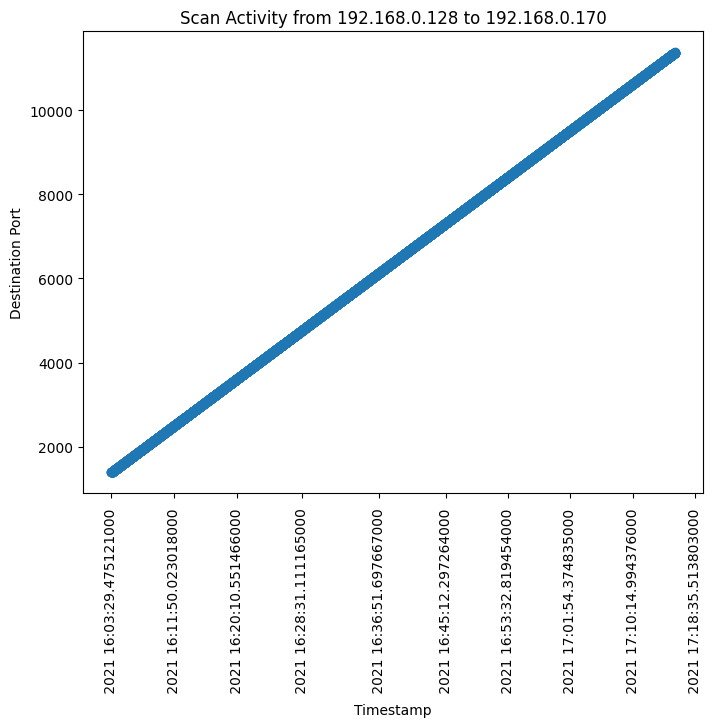

In [4]:
# Create a directed graph
graph = nx.DiGraph()

# Get unique source-destination pairs
unique_pairs = attack_port_scan[['ip.src_host', 'ip.dst_host']].drop_duplicates()

# Iterate over each pair
for _, pair in unique_pairs.iterrows():
    src_host = pair['ip.src_host']
    dst_host = pair['ip.dst_host']
    
    # Filter the data for the specific source-destination pair
    filtered_data = attack_port_scan[(attack_port_scan['ip.src_host'] == src_host) & (attack_port_scan['ip.dst_host'] == dst_host)]
    
    # Check if there is scan activity for the pair
    if len(filtered_data['tcp.dstport'].unique()) > 10:
        print(pair)
        # Add edges from source host to destination ports
        for port in filtered_data['tcp.dstport'].unique():
            graph.add_edge(src_host, port)  # Add edge from source host to destination host
            graph.add_edge(port,dst_host)  # Add edge from destination host to destination port

        # Create a plot for the pair
        plt.figure(figsize=(8, 6))
        plt.xticks(filtered_data.index[::500], filtered_data['frame.time'][::500], rotation=90)  # Show every 100th timestamp
        plt.plot(filtered_data['frame.time'], filtered_data['tcp.dstport'], marker='o')
        plt.xlabel('Timestamp')
        plt.ylabel('Destination Port')
        plt.title(f'Scan Activity from {src_host} to {dst_host}')
        plt.show()